<h1 align="center">Analisi della qualità del vino Vinho Verde</h1>
<h3 align="center">Stefano Brilli - Marzo 2019</h3>
<hr>

<h2 align="center">Introduzione</h2>

<img src="img/wine.jpg" width="600">

In questo report saranno analizzati dati riguardanti il vino portoghese <b>Vinho Verde</b> nella sua variante rossa, allo scopo di predire se, in base ai valori osservati, si stia osservando un vino di bassa o alta qualità. Il dataset utilizzato è reperibile all'indirizzo http://archive.ics.uci.edu/ml/datasets/Wine+Quality.
Al fine di costruire un classificatore binario, il dataset è stato modificato per rendere la variabile di output <b>(quality)</b> una quantità binaria. In particolare, le osservazioni aventi un output minore od uguale a 5 sono stati etichettati con il <b>valore 0 (bassa qualità)</b> mentre quelli aventi un valore qualitativo di 6 o superiore sono stati etichettati con il <b>valore 1 (alta qualità)</b>.<br>
È chiaro come una mappatura di questo tipo ponga sia i vini con punteggio 6 che quelli con punteggio 10 al pari, nella categoria dei vini di alta qualità. D'altra parte, essa potrebbe permettere ai produttori di avere un iniziale responso della qualità del proprio vino, scartando in prima battuta quelli classificati come di bassa qualità ed andando successivamente ad analizzare nel dettaglio i restanti vini al fine di determinare una scala delle qualità.<br>
I valori di input sono stati calcolati per mezzo di test fisico-chimici, mentre l'output è stato determinato tramite analisi sensoristiche.
Gli attributi del dataset sono i seguenti:

<ul>
  <li>acidità fissa</li>
  <li>acidità volatile</li>
  <li>acido citrico</li>
  <li>zucchero residuo</li>
  <li>cloruri</li>
  <li>anidride solforosa libera</li>
  <li>anidride solforosa totale</li>
  <li>densità</li>
  <li>pH</li>
  <li>solfati</li>
  <li>alcool</li>
</ul>

<h3 align="center">Strumenti utilizzati per l'analisi</h3>
L'intera analisi è stata condotta utilizzando il linguaggio <b>Python</b> e l'ambiente <b>Jupyter</b>.<br>
Le librerie utilizzate sono:
<ul>
    <li><b>pandas</b> (<a href="https://pandas.pydata.org/">https://pandas.pydata.org/</a>), libreria software per la manipolazione e l'analisi dei dati</li>
    <li><b>numpy</b> (<a href="http://www.numpy.org/">http://www.numpy.org/</a>), estensione open source del linguaggio di programmazione Python, che aggiunge supporto per vettori e matrici multidimensionali e di grandi dimensioni e con funzioni matematiche di alto livello con cui operare</li>
    <li><b>plotly</b> (<a href="https://plot.ly/feed/">https://plot.ly/feed/</a>), insieme di strumenti per l'analisi e la visualizzazione dei dati</li>
    <li><b>sklearn</b> (<a href="https://scikit-learn.org/stable/">https://scikit-learn.org/stable/</a>), libreria open source di apprendimento automatico per il linguaggio di programmazione Python</li>
</ul>    

<h2 align="center">Esplorazione e visualizzazione dei dati</h2>

Il dataset contiene <b>1599 righe</b> e <b>12 colonne</b> (11 di input + 1 di output). Il dataset non è stato alterato nel numero di osservazioni in quanto non risultavano valori mancanti.

In [2]:
# Tesina del corso Data Spaces
# Anno accademico 2018/2019
# Stefano Brilli, matricola s249914

import numpy as np
import pandas as pd


from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA as sklearnPCA

import copy

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)
from plotly.offline import plot, iplot
import plotly.plotly as py

from IPython.display import Math
import sys

np.set_printoptions(threshold=sys.maxsize)
# Questa funzione legge i dati dal file elimina le righe che contengono valori non numerici e mappa l'output sui valori 0/1
# Se quality <= 5 --> 1
# Altrimenti quality --> 0
def read_data():
    path = '/home/stefano/Documenti/Politecnico/Magistrale/2 Anno/Data Spaces/tesina/wine_quality/'
    df = pd.read_csv(path + 'winequality-red.csv', sep=';')  
    df = df[df.applymap(np.isreal).any(1)]
    df['quality'] = df['quality'].map(lambda x: 1 if x >= 6 else 0) 
    return df

In [4]:
df = read_data()
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


Osservando soltanto queste prime dieci righe possiamo notare uno sbilanciamento tra i vini di bassa qualità e quelli di alta qualità. Ovviamente il campione non può essere preso come rappresentativo dell'intero dataset. Nel grafico seguente viene quindi mostrata la distribuzione delle due etichette di output.

In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.534709
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.498950
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


In [4]:
colors = ['#2ca02c', '#d62728']
quality_values = {0: "Bassa", 1: "Alta"}

In [5]:
y = df["quality"].value_counts()

data = [go.Bar(x=[quality_values[x] for x in y.index], y=y.values, marker = dict(color = colors[:len(y.index)]))]
layout = go.Layout(
    title='Distribuzione della qualità',
    autosize=False,
    width=400,
    height=400,
    yaxis=dict(
        title='Numero di osservazioni',
    ),
    xaxis=dict(
        title='Qualità'
    ),
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='basic-bar3')

Come è possibile osservare i dati sono distrubuiti in maniera quasi bilanciata relativamente al valore di output e questo potrebbe significare che il modello di predizione sarà in grado di discriminare bene tra le due classi nella fase di classificazione di nuovi dati. <br>Nel dettaglio, i dati si distribuiscono come segue:
  
<ul>  
    <li><b>Alta qualità</b> (855 su 1599) = <b>53.47%</b></li>
    <li><b>Bassa qualità</b> (744 su 1599) = <b>46.53%</b></li>
</ul>

<h3 align="center">Distribuzione dei valori delle feature</h3>

Utilizzando i box plot è possibile osservare in che modo i valori delle feature sono distribuiti. Essi ci permettono di leggerne valore medio, massimo, minimo e rilevare eventuali outlier, ossia dati che non seguono il trend del gruppo a cui appartengono. Se presenti in numero abbastanza elevato, tali valori possono in alcuni casi rendere più complicata l'analisi, perchè il modello apprenderà pattern che si allontanano dal reale andamento dei dati in analisi.
I valori sono stati normalizzati al fine di apprezzare meglio la visualizzazione, in quanto alcune feature presentavano valori estremamente alti rendendo il grafico schiacciato verso il basso.

In [20]:
# Normalizzazione dei dati (tra 0 e 1)
X = df.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
#x_scaled = StandardScaler().fit_transform(X)
df_norm = pd.DataFrame(x_scaled)
#print(df['quality'].values)
#df_norm.columns = df.columns

# Costruzione delle strutture per rappresentare i box plot

data = []
for i in range(len(df.columns) - 1):
    data.append(go.Box(
        name = df.columns[i],
        y = df_norm[i].tolist()        
    ))
df_norm.columns = df.columns    
fig = go.Figure(data=data)
iplot(fig) 

<h3 align="center">Correlazione tra le feature</h3>

Il grafico sottostante riporta la correlazione che intercorre tre la feature. Una correlazione positiva indica che quando la prima feature cresce anche la seconda cresce. Una correlazione negativa indica una tendenza inversa all'aumento: quando la prima aumenta la seconda tende a diminuire.

In [6]:
df_ = copy.copy(df_norm).drop(columns=['quality'])
covariance_matrix = df_.corr()
covariance_matrix = covariance_matrix.values
x_ = []
y_ = []
z_ = []

for i in range(11):
    z_.append(covariance_matrix[i,])
    x_.append(df_norm.columns[i])
    y_.append(df_norm.columns[i])

trace = go.Heatmap(z=z_,
                   x=x_,
                   y=y_)    
    
#trace = go.Heatmap(z=[[1, 20, 30, 50, 1], [20, 1, 60, 80, 30], [30, 60, 1, -10, 20]],
#                   x=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
#                   y=['Morning', 'Afternoon', 'Evening'])
figure = go.Figure(data=[trace])
iplot(figure)

<h2 align="center">Analisi delle componenti principali (PCA)</h2>

L'analisi delle componenti principali (PCA, dall'inglese <b>Principal Components Analysis</b>) è una tecnica che nasce dalla necessità di migliorare le prestazioni degli algoritmi di analisi dei dati a fronte di un enorme incremento della numerosità di essi a disposizione degli analisti. Lo scopo della PCA è dunque quello di rilevare una possibile correlazione tra le diverse variabili di un dataset tale per cui la maggioranza della variabilità dell'informazione dipenda soltanto da esse. Riproiettando i dati lungo gli assi rilevati e scartando le direzioni povere di variabilità è possibile ridurre la dimensionalità del dataset, migliorando le prestazioni ed ottimizzando le risorse.
Per il calcolo delle componenti principali l'approccio è il seguente:
<ul>  
    <li>i dati vengono standardizzati</li>
    <li>si calcolano gli autovalori e gli autovettori dalla matrice di covarianza o da quella di correlazione, oppure si calcola la decomposizione a valore singolo</li>
    <li>si ordinano gli autovalori in ordine decrescente e si calcolano gli autovettori associati ad essi</li>
    <li>si costruisce la matrice W dei dati riproiettati utilizzando gli autovettori selezionati</li>
    <li>si trasforma il dataset originale tramite la matrice W per ottenere un sottospazio Y delle feature di dimensione pari al numero di autovettori utilizzati</li>
</ul>

Nel contesto di questo report sono state utilizzate le funzioni messe a disposizioni da Sklearn per il calcolo della PCA, le quali utilizzano il metodo della decomposizione a valore singolo (SVD) per trovare le componenti principali.

In [46]:
def doPCA(X_std, components, print_flag):    
    X_data = copy.copy(X_std)     
    X_data['quality'] = X_data['quality'].map(lambda x: 'Alta qualità' if x == 1 else 'Bassa qualità')     
    y = X_data['quality']
    X_data = X_data.drop(columns=['quality'])
    #print(X_data.columns)
    #X_data.drop('quality')
    sklearn_pca = sklearnPCA(n_components = components)
    Y_sklearn = sklearn_pca.fit_transform(X_data) 
    #print(Y_sklearn.columns)
    #print(Y_sklearn.shape)
    data = []
    colors = { 'red': '#2ca02c', 'green': '#d62728'}
    for name, col in zip(('Bassa qualità', 'Alta qualità'), colors.values()):

        trace = dict(
            type='scatter',
            x = Y_sklearn[y==name,0],
            y = Y_sklearn[y==name,1],
            mode = 'markers',
            name = name,
            marker = dict(
                color = col,
                size = 12,
                line = dict(
                    color='rgba(217, 217, 217, 0.14)',
                    width=0.5),
                opacity=0.8)
        )
        data.append(trace)

    layout = dict(
            xaxis=dict(title='PC1', showline=True),
            yaxis=dict(title='PC2', showline=True)
    )
    if(print_flag):
        fig = go.Figure(data=data, layout=layout)
        iplot(fig)
    return sklearn_pca

In [47]:
my_pca = doPCA(df_norm, 2, True)
my_total_pca = doPCA(df_norm, 11, False)

Salta immediatamente all'occhio la sovrapposizione dei dati sul nuovo piano di assi PC1 e PC2 e di come non sia possibile separare in cluster separati i gruppi relativi alle due diverse etichette.
Questo significa che non saremo in grado di determinare la qualità dei vini riproiettando i dati su questi due nuovi assi. Il grafico successivo mostra la quantità di varianza raccolta da ciascuna componente, dove possiamo notare come siano sufficienti le prime cinque componenti per spiegare più del 80% della varianza totale.

In [87]:
#print(my_total_pca.explained_variance_ratio_)
def print_explained_variance(explained_variance):    
    cumulative_variance = []
    cumulative_variance.append(explained_variance[0])
    for i in range(1, 11):
        old = cumulative_variance[i-1]
        new = explained_variance[i]
        cumulative_variance.append(old + new)
    
    data = [go.Bar(
            x=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11'],
            y=[explained_variance[0], explained_variance[1], explained_variance[2], 
               explained_variance[3], explained_variance[4], explained_variance[5],
               explained_variance[6], explained_variance[7], explained_variance[8],
               explained_variance[9], explained_variance[10]],
            name="Varianza spiegata"
    ), go.Bar(
            x=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11'],
            y=cumulative_variance,
            name="Varianza cumulativa"
    )]
    layout = go.Layout(
        title='Varianza spiegata',
    )
    fig = go.Figure(data=data, layout=layout)
    iplot(fig) 

In [88]:
print_explained_variance(my_total_pca.explained_variance_ratio_)

<h2 align="center">Classificazione</h2>

Dopo aver osservato i dati secondo la loro distribuzione e correlazione passiamo adesso al costruire un modello predittivo, al fine di prevedere la qualità del vino in base alle sue caratteristiche.
In questo capitolo saranno utilizzati diversi algoritmi di classificazione e, per ciascuno di essi, sarà fornita una adeguata spiegazione teorica, così che anche il lettore non esperto di questo campo possa capire e cogliere le motivazione che stanno dietro allo studio qui presentato.
Gli algoritmi di classificazione che saranno utilizzati sono:
<ul>
    <li><b>K-Nearest Neighbors (KNN)</b></li>
    <li><b>Support Vector Machines (SVM)</b></li>
    <li>[...]</li>
</ul>

<h3 align="center">K-Nearest Neighbors</h3>

Il KNN è un algoritmo utilizzato per costruire e classificare pattern di oggetti basandosi sulle caratteristiche di essi. Tra gli algoritmi utilizzati nel Machine Learning è quello più semplice da implementare e da comprendere.
Il funzionamento è semplice: i voti dei k vicini del campione determinano il gruppo a cui assegnare l'oggetto in esame. Per evitare situazioni di parità è bene scegliere un valore k che non sia un divisore del numero di gruppi distinti presenti nel dataset. Per k = 1 il campione viene assegnato al gruppo dell'oggetto a lui più vicino.
Per scegliere il valore di k più adeguato è necessario valutare la tipologia di dati che si sta esaminando e la quantità di essi. Infatti, scegliere un valore di k elevato garantisce una migliore resistenza al rumore ma rende meno risconoscibili i margini di separazione.
È possibile la cross-validation per trovare il miglior valore di k, che consiste nel partizionare il dataset in due gruppi (training set e testing set) un certo numero di volte per valutare il k che garantisca la migliore accuratezza in fase di classificazione. Nel contesto di questo report sarà utilizzato un approccio basato sulla cross-validation.

In [70]:
# Funzione per creare training e testing set
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Per valutare l'accuratezza della previsione
from sklearn import metrics

# Etichette
y = df['quality'].values

# Features
X = copy.copy(df_norm).drop(columns=['quality']).values
#X = sklearnPCA(n_components = 2).fit_transform(X)

# Splittaggio del dataset in training set e testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

# Creiamo un classificatore con k = 5
knn = KNeighborsClassifier(n_neighbors=15)

# Alleniamo il modello utilizzando il set di training
knn.fit(X_train, y_train)

# Facciamo una previsione utilizzando il set di testing
y_pred = knn.predict(X_test)

# Accuratezza della previsione, ossia la percentuale di volte in cui il classificatore ha fatto una previsione
# corretta
print("Accuratezza:",metrics.accuracy_score(y_test, y_pred))

Accuratezza: 0.7625


Un'accuratezza del 76.25% può essere considerata buona, considerando che molte delle feature erano risultate scorrelate tra loro (vedere la matrice di correlazione alcuni paragrafi in alto).
Per costruire il classificatore abbiamo utilizzato il dataset nella sua forma originale, cioè quello provvisto di 11 feature. Per tale motivo non siamo in grado di visualizzare sul piano la distribuzione dei punti e i confini di classificazione che il modello ha predetto.
Se invece fossimo interessati a vedere tali confini dovremmo necessariamente diminuire la dimensionalità del dataset fino ad avere due sole dimensioni.
Per fare ciò utilizziamo ancora la PCA, in modo che il classificatore faccia previsioni basandosi su due sole feature (PC1 e PC2).

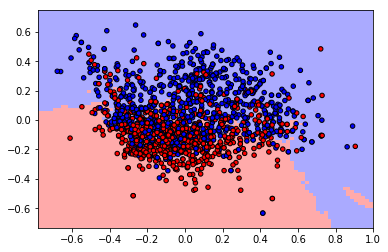

Accuratezza: 0.5208333333333334


In [69]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

y = df['quality'].values
X = copy.copy(df_norm).drop(columns=['quality']).values
X = sklearnPCA(n_components = 2).fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf = KNeighborsClassifier(n_neighbors=15)
clf.fit(X, y)

x_min, x_max = X[:, 0].min() - 0.10, X[:, 0].max() + 0.10
y_min, y_max = X[:, 1].min() - 0.10, X[:, 1].max() + 0.10
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#plt.title("3-Class classification (k = %i, weights = '%s')"
#          % (n_neighbors, weights))

plt.show()
print("Accuratezza:", metrics.accuracy_score(y_test, y_pred))

In questo caso l'<b>accuratezza</b> è <b>diminuita fino a ~52%.</b>
In altre parole il nostro modello sbaglia una volta su due. Questo fatto non deve risultare strano, perchè nel paragrafo dedicato all'analisi delle componenti principali abbiamo visto come i dati proiettati sulle prime due componenti principali non generano cluster così marcatamente separati in base alla classe di appartenenza.